<a href="https://colab.research.google.com/github/FelipeTufaile/MITx_MicroMaster/blob/main/Project_3_Intervention%2C_Control_and_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
#import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')

# 1. Linear Dynamical System Introduction

Linear dynamical systems are ubiquitous for controller design in real world applications, such as inventory control, cruise control, robotics control, and power plant control.

Linear dynamical systems are generally considered uncomplicated and the controllers tend to have good mathematical guarantees on their performance. In this project, we are going to apply some methods discussed in class to a linear dynamical system with quadratic costs. Our major focus is on the design of different control strategies.

We formally consider a discrete system taking the following system dynamics:

$$
\displaystyle  x_{t+1} = A x_ t + B u_ t + w_ t, \quad t \in \mathbb {Z}_{\ge 0}
$$

where $ x_ t \in \mathbb {R}^3 $ is the system state vector at time step $ t $, $ A \in \mathbb {R}^{3 \times 3} $ and $ B \in \mathbb {R}^{3 \times 1} $ are the system parameters, $ u_ t \in \mathbb {R} $ is the control input, and $ w_ t \in \mathbb {R}^3 $ represents unobserved noises following a multivariate Gaussian distribution $ N(0, \sigma ^2 I_3) $ with $ \sigma = 0.2 $.

In general, the system parameters $A$ and $B$ should be identified using a sequence of empirical measurements of the system states. Different kinds of regression models can be effective to estimate these parameters. Here, for simplification purposes, we skip this step and use the following system parameters:

$$
\displaystyle  A = \begin{bmatrix}  0 &  1 &  0 \\ 0 &  0 &  1 \\ 0.06 &  -0.47 &  1.20 \end{bmatrix}, \quad B = \begin{bmatrix}  0 \\ 0 \\ 1 \end{bmatrix}
$$

We initialize the system state by $x_0 = [0, 0, 0]^\top$

## Question 1.1.
According to the above system dynamic, what is the order of this system?

R: The system is order 3 since the "x" vector has dimension 3.

## Question 1.2.

Assume the first two noise terms are $w_0 = [0, 0.2, 0]^\top , w_1 = [-0.1, 0, 0.1]^\top$. When zero control is taken $(u_ t = 0, \forall t)$, calculate the system state of the second step.

In [2]:
# Defining matrix A
A = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [0.06, -0.47, 1.2]
])

# Defining matrix B
B = np.array([
    [0],
    [0],
    [1]
])

# Defining x_0
x_0 = np.array([
    [0],
    [0],
    [0]
])

# Defining u_0
u_0 = 0

# Defining u_1
u_1 = 0

# Defining w_0
w_0 = np.array([
    [0],
    [0.2],
    [0]
])

# Defining w_1
w_1 = np.array([
    [-0.1],
    [0],
    [0.1]
])

In [3]:
# Calculating x_1
x_1 = A @ x_0 + B * u_0 + w_0

print(x_1)

[[0. ]
 [0.2]
 [0. ]]


In [4]:
# Calculating x_2
x_2 = A @ x_1 + B * u_1 + w_1

print(x_2)

[[0.1  ]
 [0.   ]
 [0.006]]


For the above linear dynamical system, the (quadratic) cost function is an important concept expressed by:

$$
\displaystyle  C(x_ t, u_ t) = x_ t^\top M x_ t + R u_ t^2, \quad t \in \mathbb {Z}_{\ge 0}
$$

where $M = I_3$ and $R = 0.1$ are the given coefficients. The eventual control goal is to minimize the cumulative cost function over a finite horizon of $T$ iterations:

$$
\displaystyle  J = \sum _{t = 0}^{T-1} C(x_ t, u_ t)
$$

through the appropriate control inputs $u_t$. Unless specified, we take $T = 100$ by default.

## Question 1.3.

Consider the numerical example with $ w_0 = [0, 0.2, 0]^\top , w_1 = [-0.1, 0, 0.1]^\top $, and still we set the control actions to zeros, $ u_ t = 0, \forall t $, (same as before). Calculate the second-step cost $C(x_2, u_2)$ as well as the cumulative cost $J(T = 3)$ (three terms in summation).

In [5]:
# Defining M matrix
M = np.eye(3)

# Defining R matrix
R = 0.1

# Defining control term u_2
u_2 = 0

In [6]:
# Calculating the second-step cost
C_2 = (x_2.T @ M @ x_2)[0, 0] + R * u_2 ** 2

# Extract the scalar value from the array
C_2

np.float64(0.010036000000000002)

In [7]:
# Defining the number of time-steps
T = 3

# Initializing the cost summation "J"
J = 0

# Concatenating the state and control vectors
X = np.concatenate((x_0, x_1, x_2), axis=1)
U = np.array([u_0, u_1, u_2])

# Calculating the accumulated cost at T = 3
for t in range(T):

  # Extracting the correspoing x and u vector at time t
  x_t = X[:,t].reshape(3, 1)
  u_t = U[t]

  # Calculating the cost at time t
  j_t = (x_t.T @ M @ x_t)[0,0] + R * u_t ** 2

  # Updating the cost summation
  J += j_t

# Printing the accumulated cost
J

np.float64(0.05003600000000001)

# 2. System Simulator

**Key Formulas**

Recall the key formulas for the linear dynamical system in the previous page:

**System dynamics**: $x_{t+1} = A x_ t + B u_ t + w_ t, \quad t \in \mathbb {Z}_{\ge 0}$

**Cost function**: $C(x_ t, u_ t) = x_ t^\top M x_ t + R u_ t^2, \quad t \in \mathbb {Z}_{\ge 0}$

**Cumulative cost function**: $J = \sum _{t = 0}^{T-1} C(x_ t, u_ t)$

**Parameters**: $A = \begin{bmatrix}  0 &  1 &  0 \\ 0 &  0 &  1 \\ 0.06 &  -0.47 &  1.20 \end{bmatrix}, \quad B = \begin{bmatrix}  0 \\ 0 \\ 1 \end{bmatrix}, \quad M=I_3, \quad R=0.1$

**Initial State**: $x_0 = [0, 0, 0]^\top$

**Ending Time**: $T = 100$

In this problem, we will create a system simulator to calculate the costs associated with two simple controllers. These two controllers are given as follows:

**Zero Controller**: $u_ t = 0$ for all $t$.

**Random Controller** : $u_t \sim N(0, 0.5^2)$ independently for each $t$.


## 2.1. Random Noises Generation

The very first step is to get a random number generator for creating the noise series $w_t$ (we do not assume any realization of these noises as the problem on the previous page). You are required to use the NumPy package to generate noises in Python. You can use the following code snippet to construct $w_t$:

In [8]:
# Generating the noise vector
np.random.seed(10001)
sigma = 0.2
w = sigma * np.random.randn(3)

Hint: The above code fixes the random seed to be 10001, which guarantees the simulation results will remain the same for different implementations and operating systems. This is a programming trick to use the pseudorandom number generators. In the following problems, we will keep using this random seed for grading purpose, i.e. your answer will be certain and we can grade you properly.

In [9]:
w

array([-0.04109845,  0.03292968,  0.04315905])

## 2.2. Simulation Function

Formulate a mapping function in Python to simulate one step of the system dynamics. Here, the inputs should be a current state $x_t$ and a control action $u_t$, while the output should be the next state $x_{t+1}$ and the associated cost $C(x_t, u_t)$.

Apply this mapping function to calculate the second-step cost $C(x_2, u_2)$ again for the Zero controller. Note that we don't assume specific noise terms now, but alternatively fix the random seed as 10001.

Grading Note: The result should be rounded to four decimal places.

In [10]:
# Creating a function to simulate one step of the system dynamics
def simulate_step(x_t, u_t, w_t, A=A, B=B, M=M, R=R):

  # Updating the state
  x_new = A @ x_t + B * u_t + w_t

  # Calculating cost
  j_t = (x_t.T @ M @ x_t)[0,0] + R * u_t ** 2

  return x_new, j_t


In [11]:
# Generating the noise vector
np.random.seed(10001)
sigma = 0.2

# Initializing x_t
x_t = x_0

# Initializing the control
u_t = u_0

# Itering through all steps
for t in range(3):

  # Calculating noise
  w = sigma * np.random.randn(3)

  # Simulating step t
  x_next, j_t = simulate_step(x_t=x_t, u_t=u_t, w_t=w.reshape(3,1), A=A, B=B, M=M, R=R)

  # Updating x_t
  x_t = x_next

  print(
      f"""
      At step {t}:
      X_{t} = {x_t.reshape(3,)}
      X_{t+1} = {x_next.reshape(3,)}
      J_{t} = {j_t}
      W_{t} = {w.reshape(3,)}
      """
  )


      At step 0: 
      X_0 = [-0.04109845  0.03292968  0.04315905]
      X_1 = [-0.04109845  0.03292968  0.04315905]
      J_0 = 0.0
      W_0 = [-0.04109845  0.03292968  0.04315905]
      

      At step 1: 
      X_1 = [0.40749163 0.16607625 0.09339718]
      X_2 = [0.40749163 0.16607625 0.09339718]
      J_1 = 0.004636150233778306
      W_1 = [0.37456195 0.1229172  0.05954918]
      

      At step 2: 
      X_2 = [-0.17355852  0.24048199 -0.1933331 ]
      X_3 = [-0.17355852  0.24048199 -0.1933331 ]
      J_2 = 0.20235378312077068
      W_2 = [-0.33963478  0.14708481 -0.25180337]
      


## 2.3. Simulation Function with Reproducible Noise Injections

Now, we take a step forward to construct a one-step simulation function with reproducible noise injections. This is a simple extension of the above simulator (you may modify the function provided in the above solution). This is a technical detail that may impact your results in stochastic setting, and you need to pay attention to this issue for all the upcoming questions.

We are going to save a matrix of $T$ noise terms and one can pick the row of this matrix sequentially to implement the random noise injections in the system dynamic. You may want to only save this matrix once and use it again later without recreation. Using this noise matrix, we can guarantee that all the controller will be fairly evaluated in the same noisy situation (the noises are fixed and the simulation will not be influenced by the instantaneous random seed). It could be problematic if you try calling the random seed generator multiple times in the iteration, because any additional call of random numbers between two steps will mess up the remaining noise series.

Implementation: You set the random seed to 10001, and then use “numpy.random.randn(...)" and  (scaling) to generate a $T$-by-3 matrix $W$. In the one-step simulation function, you can add an input of $t$, and the noise for step $t$ is simply the $t$-th row of $W$ (i.e. $w_0$ is the first row or the row-index-0 of $W$).

Validation: Finish the above implementation in Python and check your noise matrix $W$ by the (0,0), (1,1), and (2,2) elements.

In [12]:
# Generating the noise vector
np.random.seed(10001)
sigma = 0.2

# Defining T
T = 100

# Initializing noise matrix W
# Here we are going to define the W matrix as 3xT instead of Tx3 as it was requested
W = np.zeros((3,T))

# Itering through all steps
for t in range(T):

  # Calculating random noise
  W[:,t] = sigma * np.random.randn(3)


## 2.4. Evaluation of Two Simple Controllers

With the above simulation function, run the linear dynamical system for $T = 100$ iterations and report the cumulative cost $J$ for the Zero and Random controllers. Before each evaluation, make sure the random seed is fixed at 10001.

In [13]:
# Defining a sequence of control action for the Controllers
np.random.seed(10001)

# Defining T
T = 100

# Initializing the Zero Controller action matrix U_Z
U_Z = np.zeros((T,))

# Initializing the Random Controller action matrix U_R
U_R = np.zeros((T,))

# Itering through all steps
for t in range(T):

  # Calculating random noise
  U_R[t] = 0.5 * np.random.randn()

In [14]:
# Simulating the Zero Controller

# Defining T
T = 100

# Initializing x_t
x_t = x_0

# Initializing the cost variable J
J = 0

# Initializing X array
X_Z = np.zeros((3,T+1))

# Itering through all steps
for t in range(T):

  # Simulating step t
  x_next, j_t = simulate_step(x_t=x_t, u_t=U_Z[t], w_t=W[:,t].reshape(3,1), A=A, B=B, M=M, R=R)

  # Updating x_t
  x_t = x_next

  # Updating the X_Z array
  X_Z[:,t+1] = x_t.reshape(3,)

  # Updating the accumulated cost
  J += j_t

print(f"Cumulative cost for the Zero Controller: {J}")

Cumulative cost for the Zero Controller: 67.32475239269097


In [15]:
# Simulating the Random Controller

# Defining T
T = 100

# Initializing x_t
x_t = x_0

# Initializing the cost variable J
J = 0

# Initializing X array
X_R = np.zeros((3,T+1))

# Itering through all steps
for t in range(T):

  # Simulating step t
  x_next, j_t = simulate_step(x_t=x_t, u_t=U_R[t], w_t=W[:,t].reshape(3,1), A=A, B=B, M=M, R=R)

  # Updating x_t
  x_t = x_next

  # Updating the X_Z array
  X_R[:,t+1] = x_t.reshape(3,)

  # Updating the accumulated cost
  J += j_t

print(f"Cumulative cost for the Random Controller: {J}")

Cumulative cost for the Random Controller: 561.7249066716255


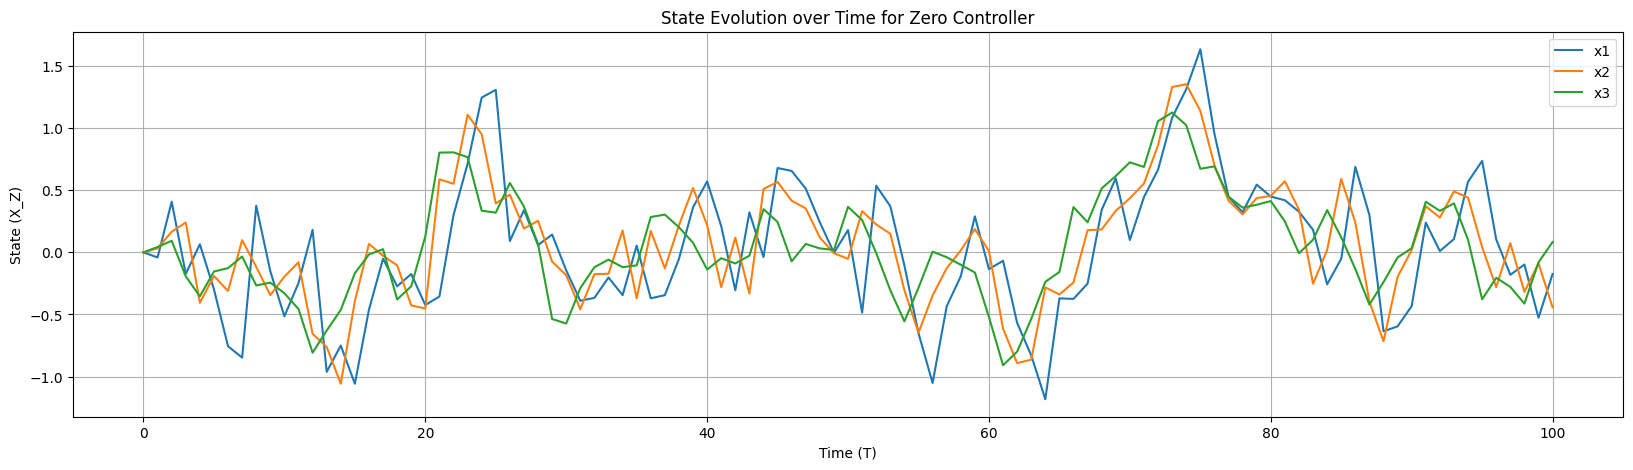

In [16]:
# Transpose X_Z to plot each state component over time
X_Z_T = X_Z.T

# Create a time vector
time = np.arange(T + 1)

# Plot each component of X_Z over time
plt.figure(figsize=(20, 5))
plt.plot(time, X_Z_T[:, 0], label='x1')
plt.plot(time, X_Z_T[:, 1], label='x2')
plt.plot(time, X_Z_T[:, 2], label='x3')

plt.xlabel('Time (T)')
plt.ylabel('State (X_Z)')
plt.title('State Evolution over Time for Zero Controller')
plt.legend()
plt.grid(True)
plt.show()

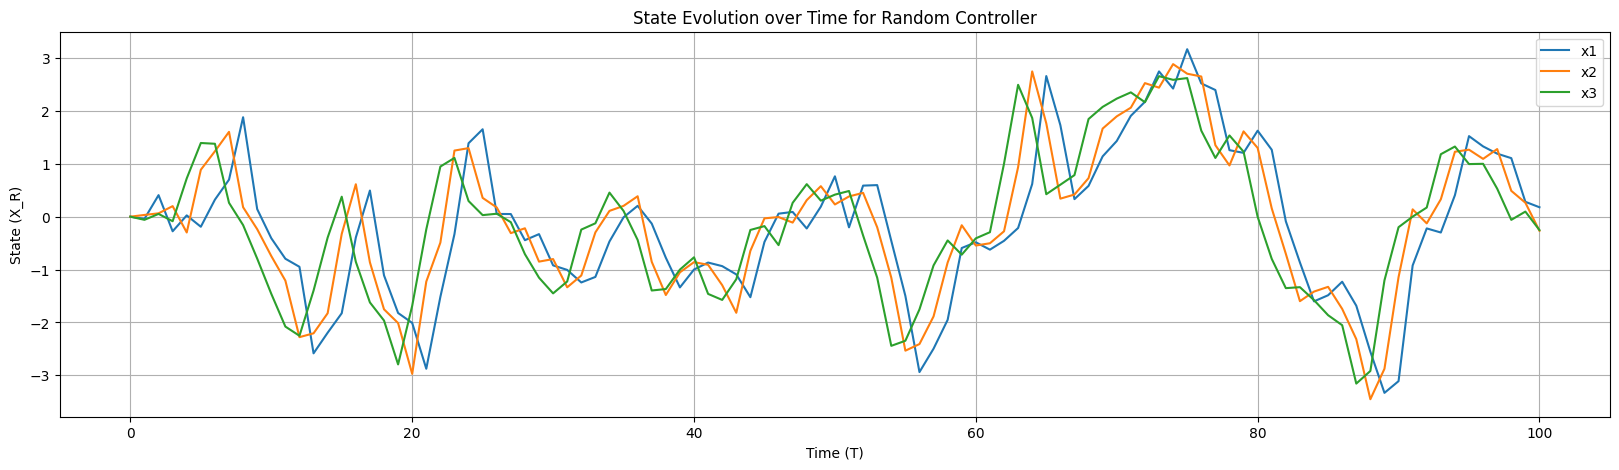

In [17]:
# Transpose X_R to plot each state component over time
X_R_T = X_R.T

# Create a time vector
time = np.arange(T + 1)

# Plot each component of X_R over time
plt.figure(figsize=(20, 5))
plt.plot(time, X_R_T[:, 0], label='x1')
plt.plot(time, X_R_T[:, 1], label='x2')
plt.plot(time, X_R_T[:, 2], label='x3')

plt.xlabel('Time (T)')
plt.ylabel('State (X_R)')
plt.title('State Evolution over Time for Random Controller')
plt.legend()
plt.grid(True)
plt.show()

# 3. Linear Quadratic Regulator (LQR)

We then focus on designing a linear quadratic regulator (LQR) to control the linear dynamical system. It is known that LQR provides the optimal cost when all the system parameters are known and accurate.

According to the theory in class, a LQR Controller can be formulated as:

$$
\displaystyle  u_ t = -K x_ t, \quad t \in \mathbb {Z}_{\ge 0}
$$

where $K \in \mathbb {R}^{1 \times 3}$ is an optimal strategy given by the discrete algebraic Riccati equation.

To solve for $K$, you can use the following code snippet in Python:

```
	from scipy import linalg as la
	P = la.solve_discrete_are(A, B, M, R)
	K = la.solve(R + B.T.dot(P).dot(B), B.T.dot(P).dot(A))
```

## Question 3.1.
Calculate $K$ and then report the cumulative cost of this LQR controller for the linear dynamical system after $T$ iterations.

In [18]:
# Redefining R
R = 0.1

# Calculating P
P = la.solve_discrete_are(A, B, M, R)

# Calculating gain K
K = la.solve(R + B.T @ P @ B, B.T @ P @ A)

In [19]:
K

array([[ 0.05815725, -0.45345359,  1.14588313]])

In [20]:
# Simulating the LQR Controller

# Defining T
T = 100

# Initializing x_t
x_t = x_0

# Initializing the cost variable J
J = 0

# Initializing X array
X_LQR = np.zeros((3,T+1))

# Itering through all steps
for t in range(T):

  # Calculating control
  u_t = -(K @ x_t)[0,0]

  # Simulating step t
  x_next, j_t = simulate_step(x_t=x_t, u_t=u_t, w_t=W[:,t].reshape(3,1), A=A, B=B, M=M, R=R)

  # Updating x_t
  x_t = x_next

  # Updating the X_Z array
  X_LQR[:,t+1] = x_t.reshape(3,)

  # Updating the accumulated cost
  J += j_t

print(f"Cumulative cost for the LQR Controller: {J}")

Cumulative cost for the LQR Controller: 22.610743388136076


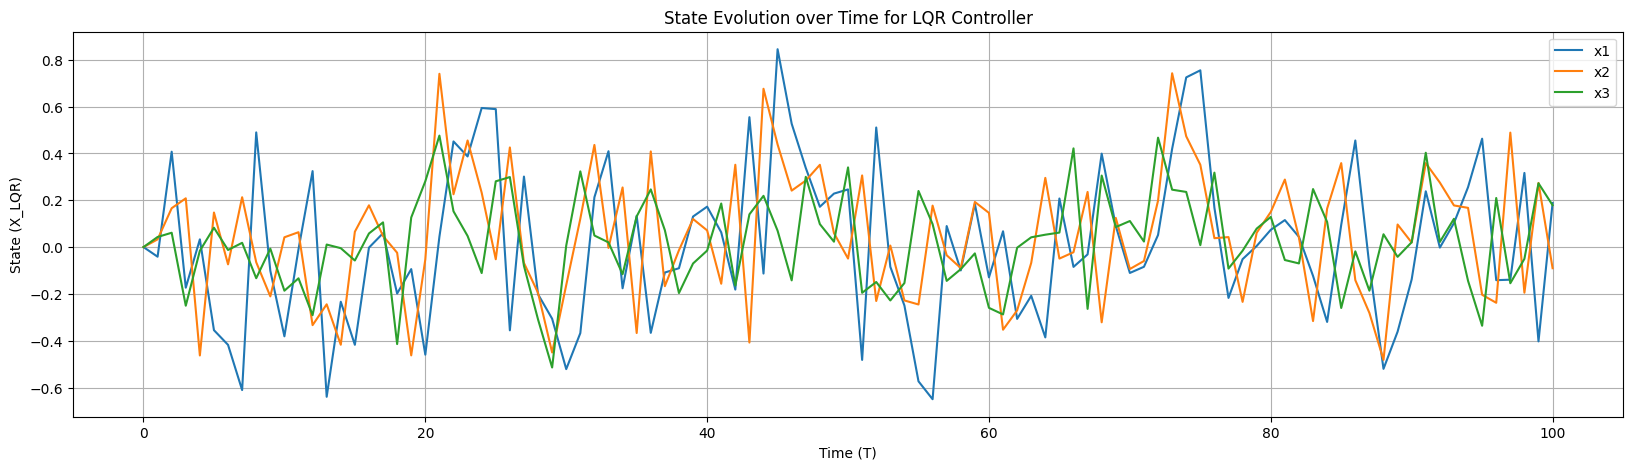

In [21]:
# Transpose X_R to plot each state component over time
X_LQR_T = X_LQR.T

# Create a time vector
time = np.arange(T + 1)

# Plot each component of X_R over time
plt.figure(figsize=(20, 5))
plt.plot(time, X_LQR_T[:, 0], label='x1')
plt.plot(time, X_LQR_T[:, 1], label='x2')
plt.plot(time, X_LQR_T[:, 2], label='x3')

plt.xlabel('Time (T)')
plt.ylabel('State (X_LQR)')
plt.title('State Evolution over Time for LQR Controller')
plt.legend()
plt.grid(True)
plt.show()

# 4. Q-Learning Controller (Untrained)

**Controller Design Revisited**

The next step is to construct a Q-learning (QL) controller for the linear dynamical system. The first focus is on the problem setup and a uncalibrated QL controller is simulated, while a learning algorithm will be developed next to calibrate the controller for better performance.

Before diving into the detailed designs, we first restate this system control problem using the language of reinforcement learning. Here, an intelligent agent can detect the system state $x_t$ and choose its control action (control strategy) $u_t$ to minimize the cumulative cost. Whenever an action  is taken, the system (environment) returns a new state $x_{t+1}$ and the cost of the current time step $C(x_t, u_t)$. Note that such a system response has already been constructed as a system simulator in Problem 1.

To design a QL controller, the first task is to formulate a proper Q function to approximate the cumulative cost. There are quite a few options with very diverse expressions, and this Q function can even be constructed in a model-free fashion using neural networks.

We only consider a simple case in this problem, and the Q function is linearly expressed by a selected group of quadratic terms as follows:

$$
\displaystyle  Q(x_ t, u_ t; \theta ) = \theta ^\top \phi (x_ t, u_ t)
$$

$$
\displaystyle  \phi (x_ t, u_ t) = \big [ 1,\  (x_ t^{(1)})^2,\  x_ t^{(1)} u_ t,\  (x_ t^{(2)})^2,\  x_ t^{(2)} u_ t,\  (x_ t^{(3)})^2,\  x_ t^{(3)} u_ t,\  u_ t^2 \big ]^\top
$$

where $Q(x_ t, u_ t; \theta ) \in \mathbb {R}$ is the Q value when taking a control action $u_t$ at the state $x_t$; $\theta \in \mathbb {R}^{8}$ is a coefficient vector to learn; $\phi (x_ t, u_ t) \in \mathbb {R}^{8}$ includes a constant term and several quadratic terms; and $x_ t^{(1)},x_ t^{(2)},x_ t^{(3)}$ are the first to third elements of $x_t$.

## 4.1. QL Controller Expression

Given a fixed $\theta$, the control function (or called policy function) is constructed as follows:

$$
\displaystyle  u_ t = u(x_ t; \theta ) = \arg \min _{u_ t} Q(x_ t, u_ t; \theta ), \quad t \in \mathbb {Z}_{\ge 0}
$$

Please determine the close-form expression of $u(x_ t; \theta )$ and then complete the coding in Python. Note that this function should take $x_t$ and $\theta$ as the inputs. For the case $\theta_8 \neq 0$, enter the formula for $u(x_ t; \theta )$ below.

The minimum of the expression $Q(x_ t, u_ t; \theta )$ can be found by setting its derivative with respect to $u_t$ to zero:

$$
Q(x_ t, u_ t; \theta) = \theta_1 + \theta_2 * x_{(1)}^{2} + \theta_3 * x_{(1)} * u_t + \theta_4 * x_{(2)}^{2} + \theta_5 * x_{(2)} * u_t + \theta_6 * x_{(3)}^{2} + \theta_7 * x_{(3)} * u_t + \theta_8 * u_t^{2}
$$

Therefore,

$$
\frac{\partial Q(x_ t, u_ t; \theta)}{\partial u_t} = \theta_3 * x_{(1)} + \theta_5 * x_{(2)} + \theta_7 * x_{(3)} + 2 * \theta_8 * u_{t}
$$

Setting to zero:
$$
0 = \theta_3 * x_{(1)} + \theta_5 * x_{(2)} + \theta_7 * x_{(3)} + 2 * \theta_8 * u_{t}
$$

Finally,

$$
u_{t} = - \frac{\theta_3 * x_{(1)} + \theta_5 * x_{(2)} + \theta_7 * x_{(3)}}{2 * \theta_8}
$$

In [22]:
def optimal_action(x_t, theta):

  # Calculating the optimal action based on the derived expression above
  u_optimal = - (theta[2] * x_t[0,0] + theta[4] * x_t[1,0] + theta[6] * x_t[2,0]) / (2 * theta[7])

  return u_optimal

## 4.2. Naive QL Controller

Now consider a Naive QL Controller with an initial $\theta _0 = [1,1,1,-2,-2,2,2,1]^\top$, and the above control function is constructed accordingly. Please simulate the linear dynamical system with this naive QL controller for $T$ iterations and report the cumulative cost.

In [23]:
# Simulating the Q-Function Controller

# Initializing theta
theta = np.array([1,1,1,-2,-2,2,2,1])

# Defining T
T = 100

# Initializing x_t
x_t = x_0

# Initializing the cost variable J
J = 0

# Initializing X array
X_Q = np.zeros((3,T+1))

# Itering through all steps
for t in range(T):

  # Calculating control
  u_t = optimal_action(x_t=x_t, theta=theta)

  # Simulating step t
  x_next, j_t = simulate_step(x_t=x_t, u_t=u_t, w_t=W[:,t].reshape(3,1), A=A, B=B, M=M, R=R)

  # Updating x_t
  x_t = x_next

  # Updating the X_Z array
  X_Q[:,t+1] = x_t.reshape(3,)

  # Updating the accumulated cost
  J += j_t

print(f"Cumulative cost for the Q-Function Controller: {J}")

Cumulative cost for the Q-Function Controller: 52.44639705564544


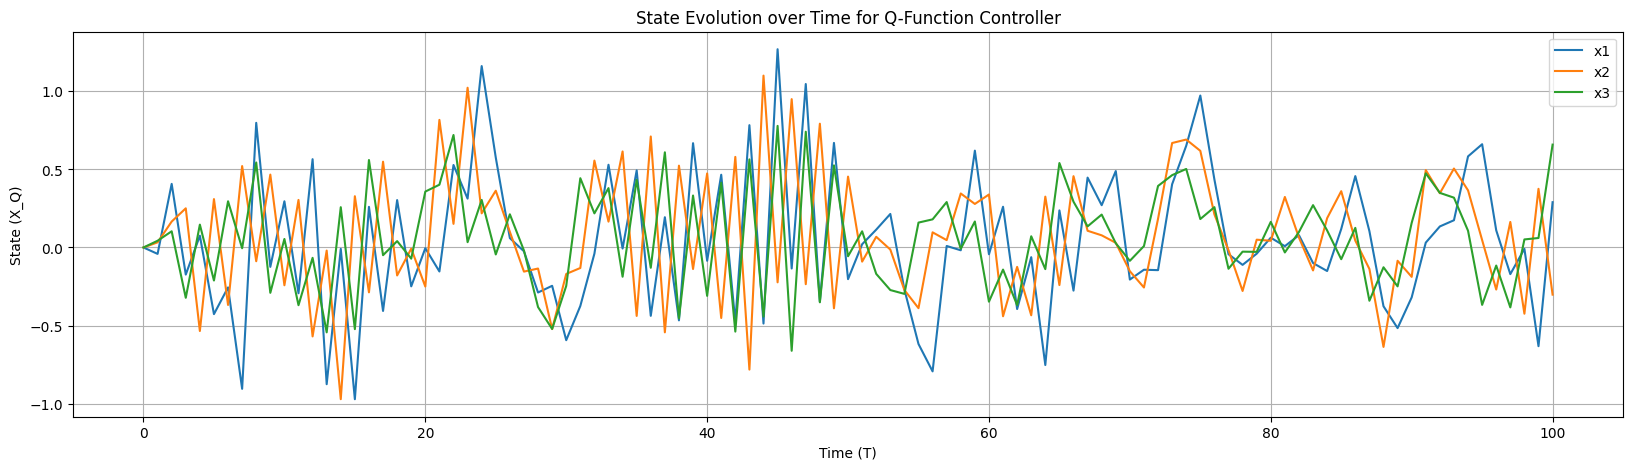

In [24]:
# Transpose X_R to plot each state component over time
X_Q_T = X_Q.T

# Create a time vector
time = np.arange(T + 1)

# Plot each component of X_R over time
plt.figure(figsize=(20, 5))
plt.plot(time, X_Q_T[:, 0], label='x1')
plt.plot(time, X_Q_T[:, 1], label='x2')
plt.plot(time, X_Q_T[:, 2], label='x3')

plt.xlabel('Time (T)')
plt.ylabel('State (X_Q)')
plt.title('State Evolution over Time for Q-Function Controller')
plt.legend()
plt.grid(True)
plt.show()

# 5. Q-Learning Controller (Training)

In the second part, we focus on improving the performance of a QL Controller by selecting a better coefficient vector $\theta$. Here $\theta$ is iteratively updated through a learning process which will be detailed later.

We apply the approximate Q-learning to update the coefficient vector $\theta$ as follows. Note that there is no discount rate (or the discount rate equals one) in the following expression.

$$
\displaystyle  \theta \leftarrow \theta + \alpha \;  \nabla _\theta Q(x_ t, u_ t; \theta ) \left[ C(x_ t, u_ t) + \min _{u_{t+1}} Q(x_{t+1}, u_{t+1}; \theta ) - Q(x_ t, u_ t; \theta ) \right] \notag
$$

$$
\displaystyle  \quad = \theta + \alpha \;  \phi (x_ t, u_ t) \left[ C(x_ t, u_ t) + Q(x_{t+1}, u(x_{t+1}; \theta ); \theta ) - Q(x_ t, u_ t; \theta ) \right]
$$

where $\alpha \in (0, 1)$ is the learning rate that decides how to sum up the current and the new estimates, and we typically set $\alpha = 0.01$; the learning process will be initialized by $\theta _0 = [1,1,1,-2,-2,2,2,1]^\top$ (same as in the preivous problem).

To implement, we should further decide the exploration rule and the action update rule. In this system, we simply follow the greedy strategy, i.e., we always use the control function with the newly updated $\theta$ such that $u_ t = u (x_ t; \theta ), \forall t$.

We summarize the training process as follows (train for $5T$ iterations):

**Step 1**: Set the initial state $x_t = x_0$ and the coefficient vector $\theta = \theta_0$. Initialize the control action $u_t$, i.e., $u_t = u(x_0; \theta _0)$.

**Step 2**: Simulate the system dynamics for one step to update the system state $x_{t+1}$.

**Step 3**: Update the coefficient vector $\theta$.

**Step 4**: Renew the control action for the next step .

**Step 5**: Check if we have already run $5T$ iterations. If so, export the current coefficient vector $\theta$; otherwise, go back to Step 2.

5.1. Training for the QL Controller

Please implement the above training process in Python, and the coefficient $\theta$ should be continuously updated for $5T$ iterations. Record the update history of $\theta$ and calculate the $T$-iteration cumulative cost for all the intermediate controllers. In total, you are asked to calculate $5T$ cost values and visualize how this cost performance changes during training.

Demonstration: The cost performance is evaluated by running the system for 100 iterations and summing up the total cost, which is exactly the same way we evaluate the previous controllers. In other word, you update $\theta$ for one step, get an intermediate controller, and run the multi-step simulator to evalute the performance, and then make another update of $\theta$, get another intermediate controller, and run the multi-step simulator again. This continues until you have updated  for  steps. You need to use the noise matrix in these evaluations.

In [25]:
# Creating a function that calculates phi
def phi_function(x_t, u_t):

    # Construct feature vector from x_t and u_t based on the problem statement
    phi = np.array([
        1,
        x_t[0,0] ** 2,
        x_t[0,0] * u_t,
        x_t[1,0] ** 2,
        x_t[1,0] * u_t,
        x_t[2,0] ** 2,
        x_t[2,0] * u_t,
        u_t ** 2
    ])

    return phi


# Creating a function that calculates Q
def Q_function(x_t, u_t, theta, phi_function=phi_function):

    # Calculating phi
    phi = phi_function(x_t, u_t)

    # Linear Q-function
    Q = theta.reshape(1,-1) @ phi.reshape(-1,1)

    return Q[0,0]


# Creating a function that calculates the optimal action u that minimizes Q
def optimal_action(x_t, theta):

  # Calculating the optimal action based on the derived expression above
  u_optimal = - (theta[2] * x_t[0,0] + theta[4] * x_t[1,0] + theta[6] * x_t[2,0]) / (2 * theta[7])

  return u_optimal


# Creating a function that updates theta
def theta_update(theta, alpha, x_t, x_next, u_t, j_t, phi_function=phi_function, optimal_action=optimal_action):

    # Calculate Q value for the current step
    Q_t = Q_function(x_t, u_t, theta)

    # Calculate Q value for the next best action
    Q_next = Q_function(x_next, optimal_action(x_next, theta), theta)

    # Update theta
    theta_new = theta + alpha * phi_function(x_t, u_t) * (j_t + Q_next - Q_t)

    return theta_new


# Creating a function that simulates the system
def simulate_system(theta, x_0=x_0, T=100, W=W, A=A, B=B, M=M, R=0.1, optimal_action=optimal_action, simulate_step=simulate_step):
    """
    Simulates the system for T steps under controller theta with noise.
    Returns cumulative cost over T steps.
    """
    # Initializing the total cost
    total_cost = 0.0

    # Initializing the state
    x_t = x_0

    # Iterating through all time steps
    for t in range(T):

        # Calculating the best action
        u_t = optimal_action(x_t, theta)

        # System update
        x_next, j_t = simulate_step(x_t, u_t, W[:,t].reshape(3,1), A, B, M, R)

        # Updating the total cost
        total_cost += j_t

        # Updating x_t
        x_t = x_next

    return total_cost

In [26]:
# Q-training

# Initializing the number of iterations
num_iterations = 5

# Initializing the learning rate alpha
alpha = 0.01

# Initializing theta
theta = np.array([1,1,1,-2,-2,2,2,1])

# Initializing J
J = np.zeros((num_iterations * T,))

# Iterating for 5 periods
for i in range(num_iterations):

  # Initializing x_t
  x_t = x_0

  # Initializing a X array
  X_LQ = np.zeros((3,T+1))

  # Iterating for T steps
  for t in range(T):

    # Simulate the system using the current theta
    J[i * T + t] = simulate_system(theta)

    # Calculating the best action
    u_t = optimal_action(x_t, theta)

    # System update
    x_next, j_t = simulate_step(x_t, u_t, W[:,t].reshape(3,1))

    # Updating theta
    theta = theta_update(theta, alpha, x_t, x_next, u_t, j_t)

    # Updating thet state
    x_t = x_next

    # Updating the state array
    X_LQ[:,t+1] = x_t.reshape(3,)

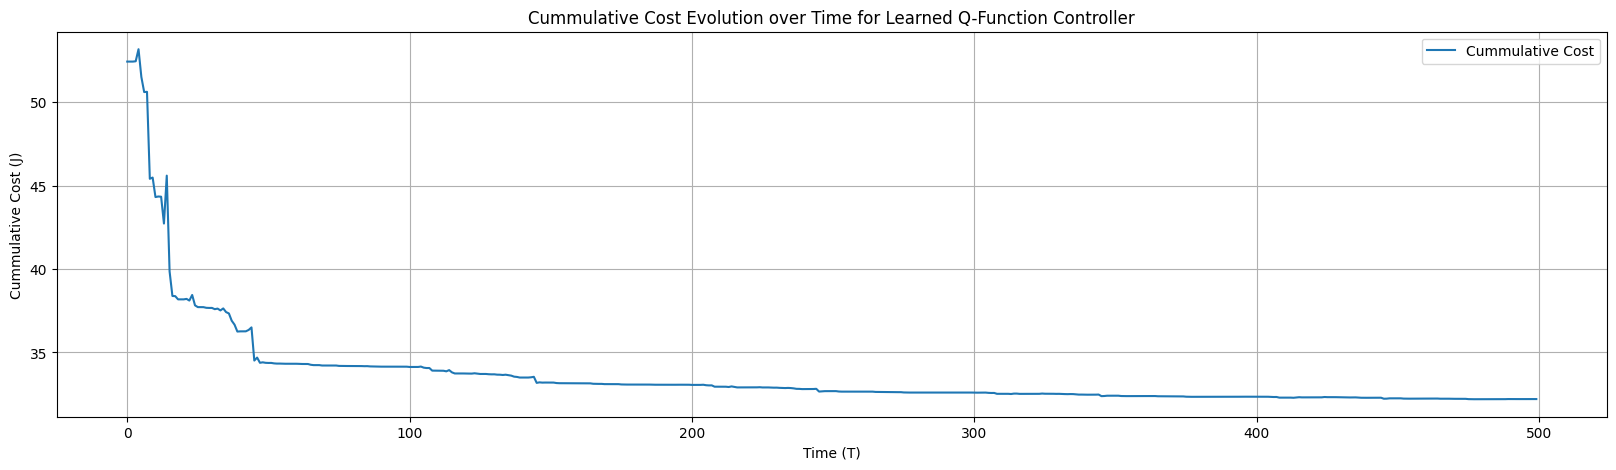

In [27]:
# Create a time vector
time = np.arange(num_iterations * T)

# Plot each component of X_R over time
plt.figure(figsize=(20, 5))
plt.plot(time, J, label='Cummulative Cost')

plt.xlabel('Time (T)')
plt.ylabel('Cummulative Cost (J)')
plt.title('Cummulative Cost Evolution over Time for Learned Q-Function Controller')
plt.legend()
plt.grid(True)
plt.show()

## 4.3. Evaluation of the QL Controller

Simulate the linear dynamical system with the QL controller from the above training. Hint: Remember to use the previous multi-step simulator.

Report the associated cumulative cost for $T$ iterations, and compare this controller with the naive QL controller as well as the LQR controller in terms of the cost and fluctuations.

In [28]:
# Q-training

# Initializing J
J = 0

# Initializing x_t
x_t = x_0

# Initializing a X array
X_LQ = np.zeros((3,T+1))

# Iterating for T steps
for t in range(T):

  # Calculating the best action
  u_t = optimal_action(x_t, theta)

  # System update
  x_next, j_t = simulate_step(x_t, u_t, W[:,t].reshape(3,1))

  # Updating the cost function
  J += j_t

  # Updating thet state
  x_t = x_next

  # Updating the state array
  X_LQ[:,t+1] = x_t.reshape(3,)

print(f"Cumulative cost for the Learned Q-Function Controller: {J}")

Cumulative cost for the Learned Q-Function Controller: 32.19913092343923


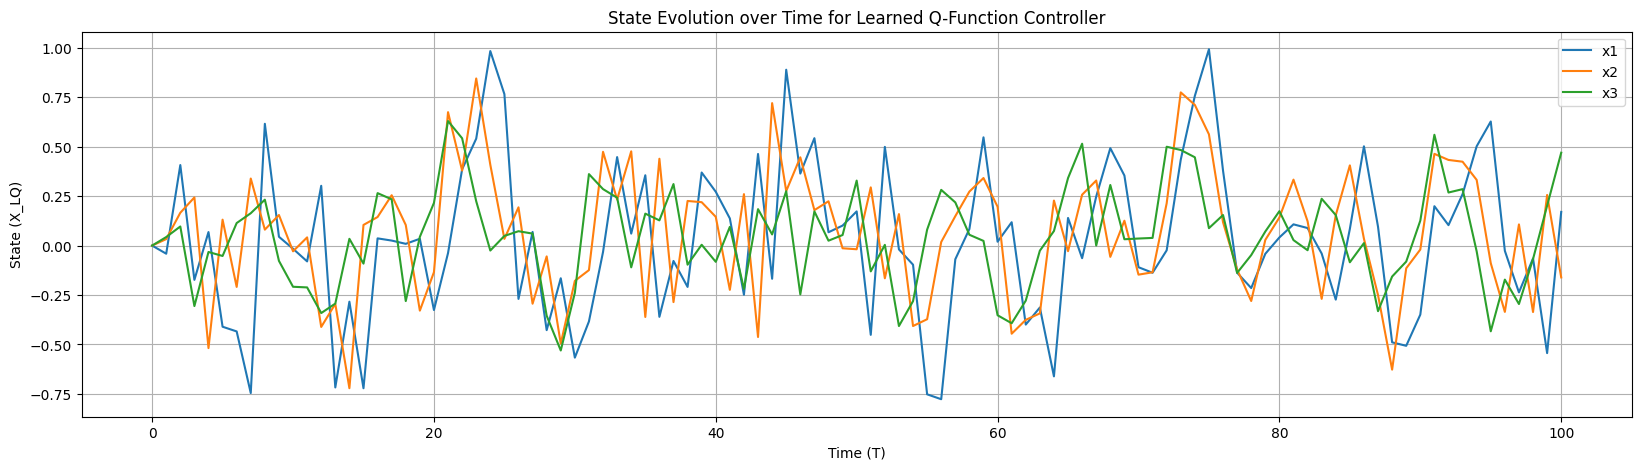

In [29]:
# Transpose X_R to plot each state component over time
X_LQ_T = X_LQ.T

# Create a time vector
time = np.arange(T + 1)

# Plot each component of X_R over time
plt.figure(figsize=(20, 5))
plt.plot(time, X_LQ_T[:, 0], label='x1')
plt.plot(time, X_LQ_T[:, 1], label='x2')
plt.plot(time, X_LQ_T[:, 2], label='x3')

plt.xlabel('Time (T)')
plt.ylabel('State (X_LQ)')
plt.title('State Evolution over Time for Learned Q-Function Controller')
plt.legend()
plt.grid(True)
plt.show()

# 5. Q-Learning Controller (Epsilon-Greedy Approach)

There are a few options for updating the control function  $u_t$ in Q-learning, and we will next use the $\epsilon$-greedy approach in this problem. The update policy is expressed as follows:

$$
\displaystyle \begin{cases}  u_ t \sim N(0, 0.5^2) &  \text {with probability of } \epsilon \\ u_ t = u(x_ t; \theta ) &  \text {with probability of } 1 - \epsilon \end{cases}
$$

We still follow the same training process given in Problem 4, but for the step 4, we instead update the control action using the above formula.

## Question 5.1.

Please implement the new training process in Python for $\epsilon = 0.1$.

Report the cost and fluctuations of the Calibrated QL Controller (call it QL$\epsilon$).

In [30]:
# Defining epsilon
episilon = 0.1

In [42]:
# Q-training

# Initializing the number of iterations
num_iterations = 5

# Initializing the learning rate alpha
alpha = 0.01

# Initializing theta
theta = np.array([1,1,1,-2,-2,2,2,1])

# Initializing J
J = np.zeros((num_iterations * T,))

# Iterating for 5 periods
for i in range(num_iterations):

  # Initializing x_t
  x_t = x_0

  # Initializing a X array
  X_LQ = np.zeros((3,T+1))

  # Iterating for T steps
  for t in range(T):

    # Simulate the system using the current theta
    J[i * T + t] = simulate_system(theta)

    # Generating action
    if episilon > np.random.uniform(low=0.0, high=1.0, size=1):

      # Exploration: sample from a random uniform distribution
      u_t = 0.5 * np.random.randn()

    else:

      # Exploitation: use the optimal action
      u_t = optimal_action(x_t, theta)


    # System update
    x_next, j_t = simulate_step(x_t, u_t, W[:,t].reshape(3,1))

    # Updating theta
    theta = theta_update(theta, alpha, x_t, x_next, u_t, j_t)

    # Updating thet state
    x_t = x_next

    # Updating the state array
    X_LQ[:,t+1] = x_t.reshape(3,)

In [44]:
J[-1]

np.float64(29.449912452694633)

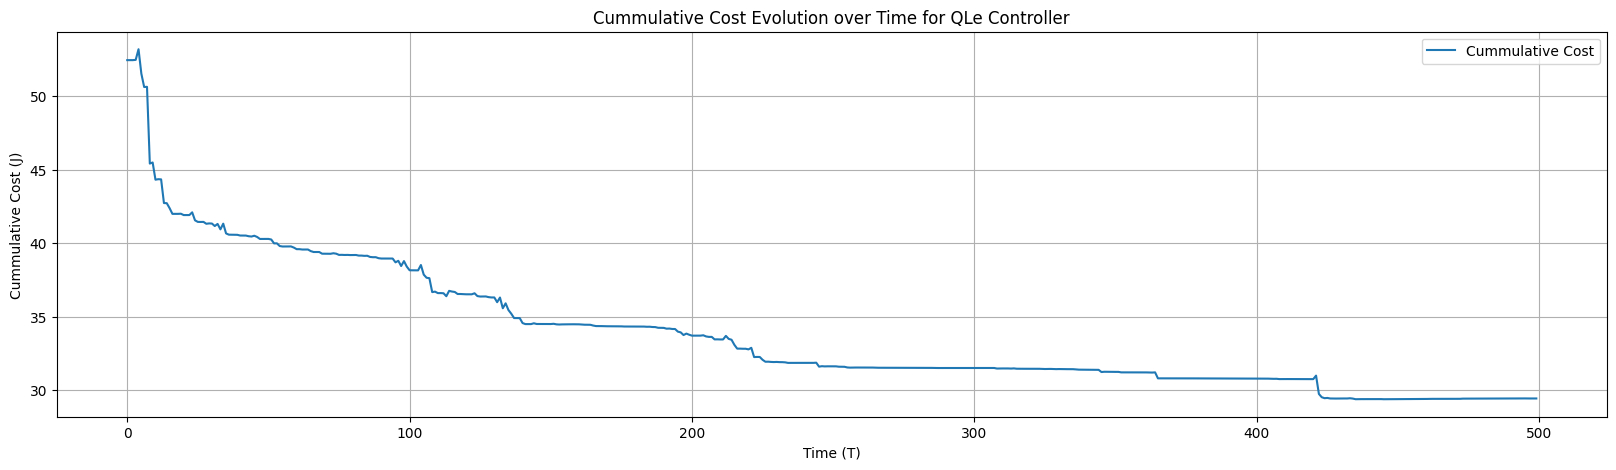

In [45]:
# Create a time vector
time = np.arange(num_iterations * T)

# Plot each component of X_R over time
plt.figure(figsize=(20, 5))
plt.plot(time, J, label='Cummulative Cost')

plt.xlabel('Time (T)')
plt.ylabel('Cummulative Cost (J)')
plt.title('Cummulative Cost Evolution over Time for QLe Controller')
plt.legend()
plt.grid(True)
plt.show()

## Question 5.2.

**Impact of exploration rate**

Please run this training process for 10 times, and then increase $\epsilon$ to be 0.5 and train again for 10 times. Now the focus is on the training performance and the stability of training process.

In [46]:
# Initializing the number of iterations
num_iterations = 10

# Initializing J
J = np.zeros((num_iterations * T, 2))

In [56]:
# Q-training

# Initializing the learning rate alpha
alpha = 0.01

# Initializing epsilon
epsilon = 0.1

# Initializing theta
theta = np.array([1,1,1,-2,-2,2,2,1])

# Iterating for 5 periods
for i in range(num_iterations):

  # Initializing x_t
  x_t = x_0

  # Initializing a X array
  X_LQ = np.zeros((3,T+1))

  # Iterating for T steps
  for t in range(T):

    # Simulate the system using the current theta
    J[i * T + t, 0] = simulate_system(theta)

    # Generating action
    if epsilon > np.random.uniform(low=0.0, high=1.0, size=1):

      # Exploration: sample from a random uniform distribution
      u_t = 0.5 * np.random.randn()

    else:

      # Exploitation: use the optimal action
      u_t = optimal_action(x_t, theta)

    # System update
    x_next, j_t = simulate_step(x_t, u_t, W[:,t].reshape(3,1))

    # Updating theta
    theta = theta_update(theta, alpha, x_t, x_next, u_t, j_t)

    # Updating thet state
    x_t = x_next

    # Updating the state array
    X_LQ[:,t+1] = x_t.reshape(3,)

In [57]:
# Q-training

# Initializing the learning rate alpha
alpha = 0.01

# Initializing epsilon
epsilon = 0.5

# Initializing theta
theta = np.array([1,1,1,-2,-2,2,2,1])

# Iterating for 5 periods
for i in range(num_iterations):

  # Initializing x_t
  x_t = x_0

  # Initializing a X array
  X_LQ = np.zeros((3,T+1))

  # Iterating for T steps
  for t in range(T):

    # Simulate the system using the current theta
    J[i * T + t, 1] = simulate_system(theta)

    # Generating action
    if epsilon > np.random.uniform(low=0.0, high=1.0, size=1):

      # Exploration: sample from a random uniform distribution
      u_t = 0.5 * np.random.randn()

    else:

      # Exploitation: use the optimal action
      u_t = optimal_action(x_t, theta)


    # System update
    x_next, j_t = simulate_step(x_t, u_t, W[:,t].reshape(3,1))

    # Updating theta
    theta = theta_update(theta, alpha, x_t, x_next, u_t, j_t)

    # Updating thet state
    x_t = x_next

    # Updating the state array
    X_LQ[:,t+1] = x_t.reshape(3,)

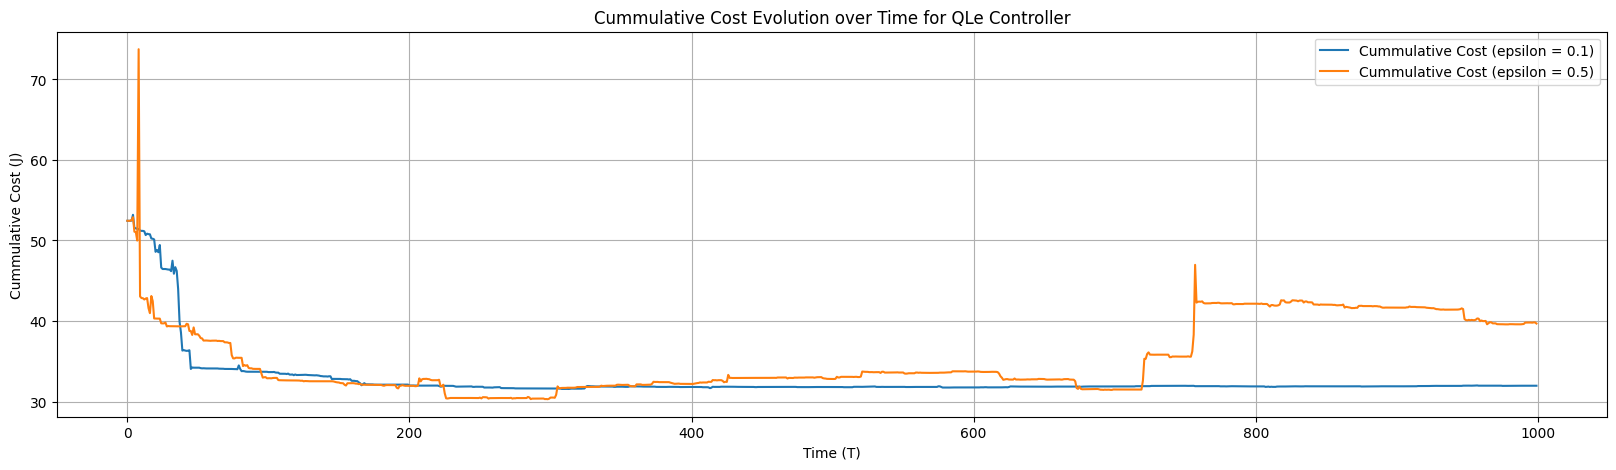

In [58]:
# Create a time vector
time = np.arange(num_iterations * T)

# Plot each component of X_R over time
plt.figure(figsize=(20, 5))
plt.plot(time, J[:,0], label='Cummulative Cost (epsilon = 0.1)')
plt.plot(time, J[:,1], label='Cummulative Cost (epsilon = 0.5)')

plt.xlabel('Time (T)')
plt.ylabel('Cummulative Cost (J)')
plt.title('Cummulative Cost Evolution over Time for QLe Controller')
plt.legend()
plt.grid(True)
plt.show()

A larger $\epsilon$ may cause worse controller performance at the same time it may improve the controller.

# 6. Controller Re-evaluation

We will consider a variant of the linear dynamical system that involves a perturbed bias dependent on the choice of control input $u_t$. The expression of system dynamic is similar as the linear system except for an additional bias $\mu_t$:

$$
\displaystyle  x_{t+1} = A x_ t + B u_ t + w_ t + \mu _ t, \quad t \in \mathbb {Z}_{\ge 0}
$$

$$
\displaystyle  \mu _{t+1} = \beta \mu _ t + F u_ t, \quad t \in \mathbb {Z}_{\ge 0}
$$

where $\mu_t$ is the perturbed bias that is linearly correlated to $u_t$; $\beta =0.8$, $F=[1, 0.5, 0]^\top$ are two coefficients that are assumed unknown in prior; we typically set $\mu _0=[0, 0, 0]^\top$.

There are many practical cases when the above unmodeled dynamics may take place. For example, many nonlinear system dynamics cannot be fully captured by a linear expression, and the residual errors are supplemented in the noises terms. Additionally, the measurement errors of $A$ and $B$  caused by data noises or outliers may also contribute to these residual errors. Another possible case is that the realization of control actions may influence the system dynamics, just as the formula shown above.

In [59]:
# Initializing beta
beta = 0.8

# Initializing F
F = np.array([1, 0.5, 0])

# Initializing mu_0
mu_0 = np.array([0, 0, 0])

We are now interested in the performance of all the above controllers under the impact of unmodeled dynamics. Note that the current assumption is that the real system dynamic is given as the above formula, but the only available system model is the previous linear one which appears as an approximation of the real system. Recall the linear system dynamic is characterized as:

$$
\displaystyle  x_{t+1} = A x_ t + B u_ t + w_ t, \quad t \in \mathbb {Z}_{\ge 0}
$$

$$
\displaystyle  A = \begin{bmatrix}  0 &  1 &  0 \\ 0 &  0 &  1 \\ 0.06 &  -0.47 &  1.20 \end{bmatrix}, \quad B = \begin{bmatrix}  0 \\ 0 \\ 1 \end{bmatrix}
$$

In particular, the design of LQR controller is based on the parameters from the linear expression. For Q-learning, only the system state can be observed and used for training, and no knowledge about the ground-truth is given.

Please re-evaluate the performance of the LQR and QL controllers (greedy strategy, and $\epsilon$-greedy strategy with $\epsilon = 0.1$) in term of the cumulative cost.

In [66]:
# Creating a function to simulate one step of the system dynamics
def simulate_step_with_disturbance(x_t, u_t, w_t, mu_t, A=A, B=B, M=M, R=R, F=F):

  # Updating the state
  x_new = A @ x_t + B * u_t + w_t.reshape(3,1) + mu_t.reshape(3,1)

  # Updating the disturbance
  mu_new = beta * mu_t.reshape(3,1) + F.reshape(3,1) * u_t

  # Calculating cost
  j_t = (x_t.T @ M @ x_t)[0,0] + R * u_t ** 2

  return x_new, mu_new, j_t

In [91]:
# Creating a function that simulates the system
def simulate_system_with_disturbance(theta, x_0=x_0, T=100, W=W, A=A, B=B, M=M, R=0.1,
                                     optimal_action=optimal_action,
                                     simulate_step_with_disturbance=simulate_step_with_disturbance):
    """
    Simulates the system for T steps under controller theta with noise.
    Returns cumulative cost over T steps.
    """
    # Initializing the total cost
    total_cost = 0.0

    # Initializing the state
    x_t = x_0

    # Initializing mu_t
    mu_t = mu_0

    # Iterating through all time steps
    for t in range(T):

        # Calculating the best action
        u_t = optimal_action(x_t, theta)

        # System update
        x_next, mu_next, j_t = simulate_step_with_disturbance(x_t, u_t, W[:,t], mu_t)

        # Updating the total cost
        total_cost += j_t

        # Updating x_t
        x_t = x_next

        # Updating mu_t
        mu_t = mu_next

    return total_cost

In [87]:
# Simulating the LQR Controller

# Initializing x_t
x_t = x_0

# Initializing mu_t
mu_t = mu_0

# Initializing X array
X_LQR = np.zeros((3,T+1))

# Initializing the cost J
J = 0

# Itering through all steps
for t in range(T):

  # Calculating control
  u_t = -(K @ x_t)[0,0]

  # Simulating step t
  x_next, mu_next, j_t = simulate_step_with_disturbance(x_t, u_t, W[:,t], mu_t)

  # Updating x_t
  x_t = x_next

  # Updating mu_t
  mu_t = mu_next

  # Updating the X_Z array
  X_LQR[:,t+1] = x_t.reshape(3,)

  # Updating the accumulated cost
  J += j_t

print(f"Cumulative cost for the LQR Controller: {J}")

Cumulative cost for the LQR Controller: 46.85949837117786


In [98]:
# Q-training

# Initializing the number of iterations
num_iterations = 10

# Initializing J
J = np.zeros((num_iterations * T,))

# Initializing the learning rate alpha
alpha = 0.01

# Initializing theta
theta = np.array([1,1,1,-2,-2,2,2,1])

# Iterating for 5 periods
for i in range(num_iterations):

  # Initializing x_t
  x_t = x_0

  # Initializing mu_t
  mu_t = mu_0

  # Initializing a X array
  X_LQ = np.zeros((3,T+1))

  # Iterating for T steps
  for t in range(T):

    # Simulate the system using the current theta
    J[i * T + t] = simulate_system_with_disturbance(theta)

    # Exploitation: use the optimal action
    u_t = optimal_action(x_t, theta)

    # Simulating step t
    x_next, mu_next, j_t = simulate_step_with_disturbance(x_t, u_t, W[:,t], mu_t)

    # Updating theta
    theta = theta_update(theta, alpha, x_t, x_next, u_t, j_t)

    # Updating thet state
    x_t = x_next

    # Updating mu_t
    mu_t = mu_next

    # Updating the state array
    X_LQ[:,t+1] = x_t.reshape(3,)

In [99]:
J[-1]

np.float64(30.391128162539736)

In [75]:
# Q-training

# Initializing the number of iterations
num_iterations = 5

# Initializing J
J = np.zeros((num_iterations * T,))

# Initializing the learning rate alpha
alpha = 0.01

# Initializing epsilon
epsilon = 0.1

# Initializing theta
theta = np.array([1,1,1,-2,-2,2,2,1])

# Iterating for 5 periods
for i in range(num_iterations):

  # Initializing x_t
  x_t = x_0

  # Initializing mu_t
  mu_t = mu_0

  # Initializing a X array
  X_LQ = np.zeros((3,T+1))

  # Iterating for T steps
  for t in range(T):

    # Simulate the system using the current theta
    J[i * T + t] = simulate_system(theta)

    # Generating action
    if epsilon > np.random.uniform(low=0.0, high=1.0, size=1):

      # Exploration: sample from a random uniform distribution
      u_t = 0.5 * np.random.randn()

    else:

      # Exploitation: use the optimal action
      u_t = optimal_action(x_t, theta)


    # Simulating step t
    x_next, mu_next, j_t = simulate_step_with_disturbance(x_t, u_t, W[:,t], mu_t)

    # Updating mu_t
    mu_t = mu_next

    # Updating theta
    theta = theta_update(theta, alpha, x_t, x_next, u_t, j_t)

    # Updating thet state
    x_t = x_next

    # Updating the state array
    X_LQ[:,t+1] = x_t.reshape(3,)

In [76]:
J[-1]

np.float64(37.70120962928306)

This comparison shares an interesting example that the model-free approaches (RL) might perform better than the model-based approaches (LQR) when the system model is not perfectly accurate. In many real-world cases, such flexibility of model-free approaches is highly preferred.